# TD ABM2 Faverjon

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import powerlaw

1. Plotting the returns

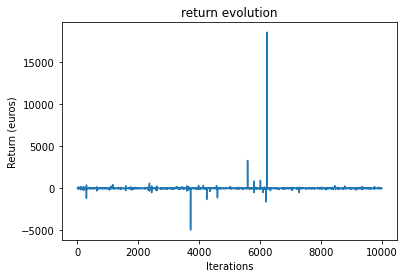

In [ ]:
taille = 10000
sigma = 1.5
alpha = 3
alphachap =[1 for i in range (taille)]
epsilon=np.random.normal(size=taille, scale = sigma)
retur = [1 for i in range (taille)]
for t in range(1,taille-1):
    alphachap[t] = retur[t]/retur[t-1] + alphachap[t-1]
    retur[t+1] = (alpha-alphachap[t])*retur[t]+epsilon[t+1]


time=np.linspace(1,taille, taille)
plt.plot(time,retur)
plt.title("return evolution")
plt.xlabel("Iterations")
plt.ylabel("Return (euros)")
plt.show()



As a comment, we could say that the result graph is extremely wide and very unpredictable.

2. Plotting the ECDF

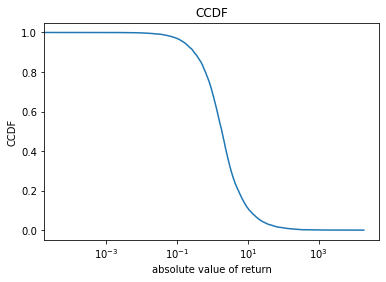

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
retur = np.abs(retur)
proba = ECDF(retur)
plt.plot(proba.x, 1-proba.y)
plt.xscale('log')
plt.yscale('log')
plt.title("CCDF")
plt.xlabel("absolute value of return")
plt.ylabel("CCDF")
plt.show()


The tail is in straight line, so this is a sign that $ P(abs(r)>R) $ has heavy tails

Calculating best minimal value for power law fit
/Users/paulfaverjon/miniforge3/envs/finance/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


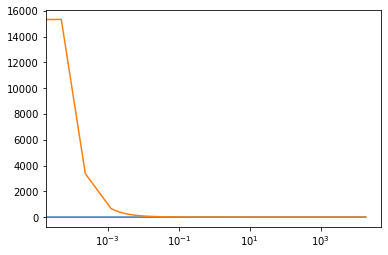

In [ ]:
mypl = powerlaw.Fit(retur)
expo= mypl.alpha
plt.plot(proba.x, 1-proba.y)
res = np.power(proba.x, 1-expo)
plt.plot(proba.x, res)
plt.xscale('log')
plt.yscale('log')

plt.show()




We can then conclude that the mypl.alpha is gamma + 1

# Plot the mean return

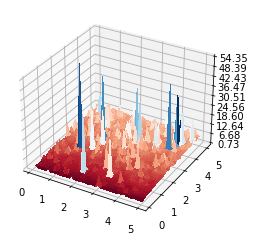

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
taille = 10000
defi = 50
sigma = np.linspace(0.1, 5 ,defi)
alpha = np.linspace(0.1, 5 ,defi)
S,A  = np.meshgrid(sigma, alpha)
alphachap =[1 for i in range (taille)]
resul = np.zeros((defi,defi))
retur = [1 for i in range (taille)]
for i in range(defi):
    for j in range (defi):
        epsilon=np.random.normal(size=taille, scale = sigma[i])
        for t in range(1,taille-1):
            alphachap[t] = retur[t]/retur[t-1] + alphachap[t-1]
            retur[t+1] = (alpha[j]-alphachap[t])*retur[t]+epsilon[t+1]
        retur = np.abs(retur)
        mean= np.average(retur)
        alphachap[0]=1
        retur[0]=1
        resul[i,j]= np.sqrt(mean)


        
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(S, A, resul, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()

# Plot of gamma : 

In [6]:
taille = 10000
defi = 10
sigma = np.linspace(0.1, 5 ,defi)
alpha = np.linspace(0.1, 5 ,defi)
S,A  = np.meshgrid(sigma, alpha)
gamma = np.zeros((defi,defi))
for i in range(defi): 
    for j in range (defi): 
        epsilon=np.random.normal(size=taille, scale = sigma[i])
        for t in range(1,taille-1):
            alphachap[t] = retur[t]/retur[t-1] + alphachap[t-1]
            retur[t+1] = (alpha[j]-alphachap[t])*retur[t]+epsilon[t+1]
        retur = np.abs(retur)
        mypl = powerlaw.Fit(retur)
        gamma [i,j]= mypl.alpha-1

        
        







fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(S, A, gamma, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()


Calculating best minimal value for power law fit
/Users/paulfaverjon/miniforge3/envs/finance/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


KeyboardInterrupt: 

4.Optimal learning and markets dynamics


In [ ]:
import yfinance as yfin
import datetime

tickerC = yfin.Ticker('C')
prices = tickerC.history(start = datetime.datetime(2006, 1, 1), end =datetime.datetime(2012,1,1))

prices = prices [["Close"]].to_numpy()
prices = [prix[0] for prix in prices]
length = 252
total = len(prices)




Calculating best minimal value for power law fit
/Users/paulfaverjon/miniforge3/envs/finance/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Cal

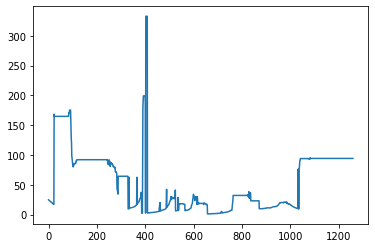

In [ ]:
gammas = np.zeros(total-length)
for i in range (total-length): 
    data = prices[i :i + length]
    data = powerlaw.Fit(data)
    gammas[i] = data.alpha -1

plt.plot(gammas)
plt.show()
    



We understand that most traders use a 400 days trading strategy.